# Restricted Botlzman Machines (RBM)

In [194]:
import os
from typing import List, Dict, Tuple, Literal, Optional, Union, Iterable

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from tqdm import tqdm
from numpy._typing import ArrayLike

ArrayLike = Union[List, Tuple, np.ndarray]

In [52]:
DATA_FOLDER = "../data/"
ALPHA_DIGIT_PATH = os.path.join(DATA_FOLDER, "binaryalphadigs.mat")
MNIST_PATH = os.path.join(DATA_FOLDER, "mnist_all.mat")

if not os.path.exists(ALPHA_DIGIT_PATH):
    raise FileNotFoundError(f"The file {ALPHA_DIGIT_PATH} does not exist.")

### 3.1 Implementing a RBM and testing on Binary AlphaDigits

In [164]:
def _load_data(file_path: str) -> Dict[str, np.ndarray]:
    """
    Load Binary AlphaDigits data from a .mat file.

    Parameters:
    - file_path (str): Path to the .mat file containing the data.

    Returns:
    - data (dict): Loaded data dictionary.
    """
    if file_path is None:
        raise ValueError("File path must be provided.")

    return scipy.io.loadmat(file_path)


data = _load_data(ALPHA_DIGIT_PATH)
class_labels = data["classlabels"].flatten() 
class_count = data["classcounts"].flatten()
df = pd.DataFrame(
    {
        "Class Labels": class_labels,
        "Class Count": class_count
    }
)
df["Class Labels"] = df["Class Labels"].apply(lambda x: x[0])
df["Class Count"] = df["Class Count"].apply(lambda x: x[0][0])
df

,Class Labels,Class Count
0,0,39
1,1,39
2,2,39
3,3,39
4,4,39
5,5,39
6,6,39
7,7,39
8,8,39
9,9,39


In [176]:
def _load_data(file_path: str, which: Literal["alphadigit", "mnist"]="alphadigit") -> Dict[str, np.ndarray]:
    """
    Load Binary AlphaDigits data from a .mat file.

    Parameters:
    - file_path (str): Path to the .mat file containing the data.
    - which (Literal["alphadigit", "mnist"], optional): Specifies 
        which data to load. The default value is "alphadigit".

    Returns:
    - data (dict): A dictionary containing the loaded data.

    Raises:
    - ValueError: If the file_path parameter is None.
    - ValueError: If the which parameter is not "alphadigit".

    Example Usage:
    ```python
    data = _load_data("data.mat", "alphadigit")
    ```
    """
    if file_path is None:
        raise ValueError("File path must be provided.")
    
    if which == "alphadigit":
        return scipy.io.loadmat(file_path)["dat"]
    
    raise ValueError("MNIST NOT YET AVAILABLE.")

alphadigit_data = _load_data(ALPHA_DIGIT_PATH) 
print(alphadigit_data.shape)
print(alphadigit_data[0][0].shape)

(36, 39)
(20, 16)


In [177]:
def _map_characters_to_indices(characters: Union[str, int, List[Union[str, int]]]) -> List[int]:
    """
    Map alphanumeric character to its corresponding index.

    Parameters:
    - character (str, int, list of str or int): Alphanumeric character or its index.

    Returns:
    - char_index (int): Corresponding index for the character.
    """
    if isinstance(characters, list):
        return [_map_characters_to_indices(char) for char in characters]
    if isinstance(characters, int) and 0 <= characters <= 35:
        return [characters]
    if (isinstance(characters, str) and characters.isdigit()
          and 0 <= int(characters) <= 9):
        return [int(characters)]
    if (isinstance(characters, str) and characters.isalpha()
          and 'A' <= characters.upper() <= 'Z'):
        return [ord(characters.upper()) - ord('A') + 10]
    
    raise ValueError(
        "Invalid character input. It should be an alphanumeric" 
        "character '[0-9|A-Z]' or its index representing '[0-35]'."
    )

for char in [0, 10, "A", [1, "C"], 36]:
    try:
        map = _map_characters_to_indices(char)
        print(f"{char} > map to > {map}")
    except:
        print(f"{char} > no mapping available, out of range")

0 > map to > [0]
10 > map to > [10]
A > map to > [10]
[1, 'C'] > map to > [[1], [12]]
36 > no mapping available, out of range


(78, 320)


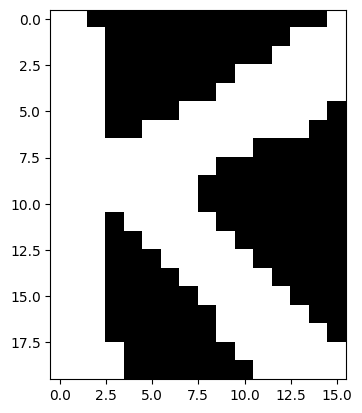

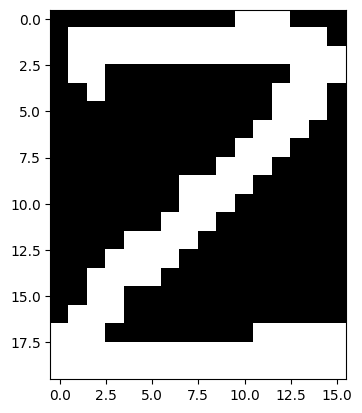

In [183]:
def read_alpha_digit(characters: Optional[Union[str, int, List[Union[str, int]]]] = None,
                     file_path: Optional[str] = ALPHA_DIGIT_PATH,
                     data: Optional[Dict[str, np.ndarray]] = None,
                     use_data: bool = False,
                     ) -> np.ndarray:
    """
    Reads binary AlphaDigits data from a .mat file or uses already loaded data. 
    It extracts the data for a specified alphanumeric character or its index, and 
    flattens the images into one-dimensional vectors.

    Parameters:
    - characters (Union[str, int, List[Union[str, int]]], optional): Alphanumeric character 
        or its index whose data needs to be extracted. It can be a single character or 
        a list of characters. Default is None.
    - file_path (str, optional): Path to the .mat file containing the data. 
        Default is None.
    - data (dict, optional): Already loaded data dictionary. 
        Default is None.
    - use_data (bool): Flag to indicate whether to use already loaded data.
        Default is False.

    Returns:
    - flattened_images (numpy.ndarray): Flattened images for the specified character(s).
    """
    if not use_data:
        data = _load_data(file_path, which="alphadigit")

    char_indices = _map_characters_to_indices(characters)

    # Select the rows corresponding to the characters indices.
    char_data: np.ndarray = data[char_indices]
    
    # Flatten each image into a one-dimensional vector.
    flattened_images = np.array([image.flatten() for image in char_data.flatten()])
    return flattened_images

char = [20, "Z"]
data = read_alpha_digit(char, ALPHA_DIGIT_PATH)
print(data.shape)
plt.imshow(data[0].reshape(20, 16), cmap="gray")
plt.show()
plt.imshow(data[40].reshape(20, 16), cmap="gray")
plt.show()


In [179]:
print("data shape:", data.shape)

data shape: (78, 320)


In [205]:
class RBM:
    def __init__(self, n_visible: int, n_hidden: int, random_state=None) -> None:
        """
        Initialize the Restricted Boltzmann Machine.

        Parameters:
        - n_visible (int): Number of visible units.
        - n_hidden (int): Number of hidden units.
        - random_state: Random seed for reproducibility.
        """
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        
        self.a = np.zeros((1, n_visible))
        self.b = np.zeros((1, n_hidden))
        self.rng = np.random.default_rng(random_state)
        self.W = 1e-4 * self.rng.standard_normal(size=(n_visible, n_hidden))

    def _sigmoid(self, x: np.ndarray) -> np.ndarray:
        """
        Sigmoid activation function.

        Parameters:
        - x (numpy.ndarray): Input array.

        Returns:
        - numpy.ndarray: Result of applying the sigmoid function to the input.
        """
        return 1 / (1 + np.exp(-x))
    
    def _reconstruction_error(self, input: np.ndarray, image: np.ndarray) -> float:
        """
        Compute reconstruction error.

        Parameters:
        - input (numpy.ndarray): Original input data.
        - image (numpy.ndarray): Reconstructed image.

        Returns:
        - float: Reconstruction error.
        """
        return np.round(np.power(image - input, 2).mean(), 3)

    def entree_sortie(self, data: np.ndarray) -> np.ndarray:
        """
        Compute hidden units given visible units.

        Parameters:
        - data (numpy.ndarray): Input data, shape (n_samples, n_visible).

        Returns:
        - numpy.ndarray: Hidden unit activations, shape (n_samples, n_hidden).
        """
        return self._sigmoid(data @ self.W + self.b)

    def sortie_entree(self, data_h: np.ndarray) -> np.ndarray:
        """
        Compute visible units given hidden units.

        Parameters:
        - data_h (numpy.ndarray): Hidden unit activations, shape (n_samples, n_hidden).

        Returns:
        - numpy.ndarray: Reconstructed visible units, shape (n_samples, n_visible).
        """
        return self._sigmoid(data_h @ self.W.T + self.a)

    def train(self, data: np.ndarray, learning_rate: float=0.1, n_epochs: int=10, batch_size: int=10, print_each=10) -> 'RBM':
        """
        Train the RBM using Contrastive Divergence.

        Parameters:
        - data (numpy.ndarray): Input data, shape (n_samples, n_visible).
        - learning_rate (float): Learning rate for gradient descent. Default is 0.1.
        - n_epochs (int): Number of training epochs. Default is 10.
        - batch_size (int): Size of mini-batches. Default is 10.

        Returns:
        - RBM: Trained RBM instance.
        """
        n_samples = data.shape[0]
        for epoch in range(n_epochs):
            self.rng.shuffle(data)
            for i in tqdm(range(0, n_samples, batch_size), desc=f"Epoch {epoch}"):
                batch = data[i:i+batch_size]
                pos_h_probs = self.entree_sortie(batch)
                pos_v_probs = self.sortie_entree(pos_h_probs)
                neg_h_probs = self.entree_sortie(pos_v_probs)
                
                # Update weights and biases
                self.W += learning_rate * (batch.T @ pos_h_probs - pos_v_probs.T @ neg_h_probs) / batch_size
                self.b += learning_rate * (pos_h_probs.mean(axis=0) - neg_h_probs.mean(axis=0))
                self.a += learning_rate * (batch.mean(axis=0) - pos_v_probs.mean(axis=0))
                
            if epoch % print_each == 0:
                tqdm.write(
                    f"Reconstruction error: {self._reconstruction_error(batch, pos_v_probs)}.")

        return self

    def generer_image(self, n_samples: int=1, n_gibbs_steps: int=1) -> np.ndarray:
        """
        Generate samples from the RBM using Gibbs sampling.

        Parameters:
        - n_samples (int): Number of samples to generate. Default is 1.
        - n_gibbs_steps (int): Number of Gibbs sampling steps. Default is 100.

        Returns:
        - numpy.ndarray: Generated samples, shape (n_samples, n_visible).
        """
        samples = np.zeros((n_samples, self.n_visible))
        
        # Matrix of initlization value of Gibbs samples for each sample. 
        V = self.rng.binomial(1, self.rng.random(), size=n_samples * self.n_visible).reshape((n_samples, self.n_visible))
        for i in range(n_samples):
            for _ in range(n_gibbs_steps):
                h_probs = self._sigmoid(V[i] @ self.W + self.b)
                h = self.rng.binomial(1, h_probs)
                v_probs = self._sigmoid(h @ self.W.T + self.a)
                v = self.rng.binomial(1, v_probs)
            samples[i] = v
        return samples


Epoch 0: 100%|██████████| 4/4 [00:00<00:00, 999.83it/s]


Reconstruction error: 0.163.


Epoch 10: 100%|██████████| 4/4 [00:00<00:00, 799.56it/s]


Reconstruction error: 0.141.


Epoch 20: 100%|██████████| 4/4 [00:00<00:00, 1000.19it/s]


Reconstruction error: 0.106.


Epoch 30: 100%|██████████| 4/4 [00:00<00:00, 667.22it/s]


Reconstruction error: 0.088.


Epoch 40: 100%|██████████| 4/4 [00:00<00:00, 800.02it/s]


Reconstruction error: 0.074.


Epoch 50: 100%|██████████| 4/4 [00:00<00:00, 1000.13it/s]


Reconstruction error: 0.057.


Epoch 60: 100%|██████████| 4/4 [00:00<00:00, 799.49it/s]


Reconstruction error: 0.048.


Epoch 70: 100%|██████████| 4/4 [00:00<00:00, 800.02it/s]


Reconstruction error: 0.031.


Epoch 80: 100%|██████████| 4/4 [00:00<00:00, 800.52it/s]


Reconstruction error: 0.036.


Epoch 90: 100%|██████████| 4/4 [00:00<00:00, 571.68it/s]


Reconstruction error: 0.023.


Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 798.99it/s]


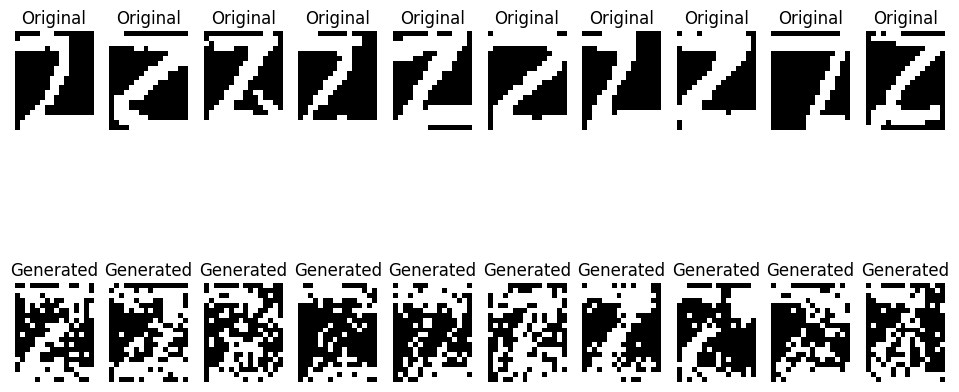

In [207]:
# Load the alpha_digit data
data = read_alpha_digit(file_path=ALPHA_DIGIT_PATH, characters='Z')

# Initialize RBM
n_visible = data.shape[1]  # Number of visible units (size of each image)
n_hidden = 100  # Number of hidden units (hyperparameter)
rbm = RBM(n_visible=n_visible, n_hidden=n_hidden, random_state=42)

# Train RBM
rbm.train(data, learning_rate=0.1, n_epochs=100, batch_size=10)

# Generate samples
generated_samples = rbm.generer_image(n_samples=10, n_gibbs_steps=1)

# Plot original and generated samples
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(data[i].reshape(20, 16), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(2, 10, i + 11)
    plt.imshow(generated_samples[i].reshape(20, 16), cmap='gray')
    plt.title('Generated')
    plt.axis('off')

plt.show()